# Polynomial Regression

In [1]:
# from google.colab import files
# up = files.upload()

## import dataset

In [2]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df = df[['A', 'T']]
df.head(3)

,A,T
0,2.0,196
1,2.4,221
2,1.5,136


In [3]:
# df.info()

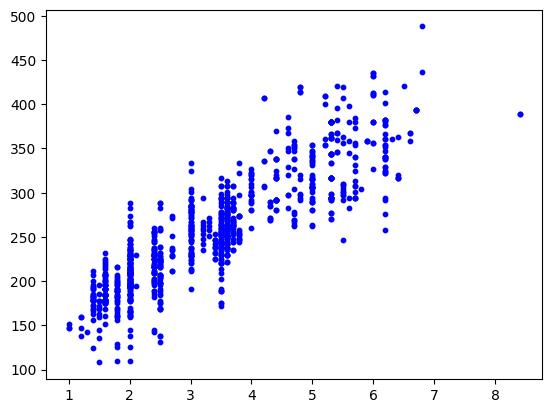

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['A'], df['T'],s=10, c='b')
plt.show()

## cleaning

In [5]:
# clean the data

## encoding

In [6]:
# encode the data

## define x , y

In [7]:
import numpy as np
x = np.array(df[['A']])
y = np.array(df['T'])

In [8]:
y[:5]

array([196, 221, 136, 255, 244])

## spliting

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
### finding best random state 

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# lst = []
# for i in range(1,10):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     pnf = PolynomialFeatures(degree=2).fit(x_train)
#     x_train_pnf = pnf.transform(x_train)
#     x_test_pnf = pnf.transform(x_test)
#     pr = LinearRegression()
#     pr.fit(x_train_pnf, y_train)
#     yhat_test = pr.predict(x_test_pnf)
#     r2 = r2_score(y_test, yhat_test)
#     lst.append(r2)
# print(f"r2_score: {round(max(lst), 2)}")
# rs = np.argmax(lst) + 1
# print(f"random_state: {rs}")

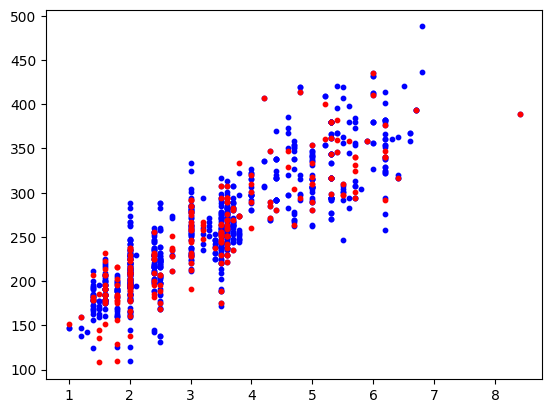

In [11]:
plt.scatter(x_train, y_train, s=10, c='b')
plt.scatter(x_test, y_test, s=10, c='r')
plt.show()

## preprocessing on x data

In [12]:
from sklearn.preprocessing import PolynomialFeatures
pnf = PolynomialFeatures(degree=2).fit(x_train)

In [13]:
x_train_pnf = pnf.transform(x_train)
x_test_pnf = pnf.transform(x_test)

In [14]:
x_train_pnf[:3]

array([[ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ]])

## scaling

In [ ]:
# do not need for scaling in simple polynomial regression

## fit train data

In [15]:
# def param
# fit_intercept=True, copy_X=True, n_jobs=None, positive=False

In [16]:
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
pr.fit(x_train_pnf, y_train)

LinearRegression()

In [17]:
print(pr.intercept_)
print(pr.coef_)

112.92021963451731
[ 0.         47.42976379 -1.12705382]


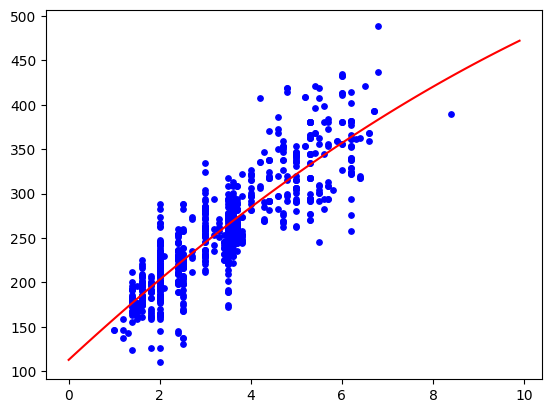

In [18]:
xx = np.arange(0,10,0.1)
plt.scatter(x_train, y_train, s=15, c='b')
plt.plot(xx, pr.intercept_ + pr.coef_[1] * xx + pr.coef_[2] * np.power(xx, 2) , c='r')
plt.show()

In [19]:
### K-fold cross validation

# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     'fit_intercept': [True, False],
#     'copy_X': [True, False],
#     'n_jobs': [None],
#     'positive': [True, False]
# }

# pr = LinearRegression()
# gs = GridSearchCV(estimator=pr, param_grid=parameters, cv=5)

# gs.fit(x_train, y_train)

# best_params = gs.best_params_
# print(best_params)

## predict test data

In [20]:
yhat_test = pr.predict(x_test_pnf)

## evaluate the model

In [21]:
from sklearn.metrics import r2_score
print("r2-score: %0.2f" % r2_score(y_test, yhat_test))

r2-score: 0.77


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(f"MSE: {mean_squared_error(y_test, yhat_test)}")
print(f"MAE: {mean_absolute_error(y_test, yhat_test)}")

MSE: 960.8705832028331
MAE: 23.915883545298716


## predict new data

In [23]:
pr.predict(pnf.transform([[2]]))

array([203.27153193])

## save the model

In [24]:
# import joblib
# joblib.dump(pr, 'pr_model.pkl')

## load the model

In [25]:
# import joblib
# pr = joblib.load('pr_model.pkl')